Nama : Ahmad Sofiyurrohman

Sumber Dataset : Kaggle

sentiment-emotion-labelled_Dell_tweets.csv
https://www.kaggle.com/datasets/ankitkumar2635/sentiment-and-emotions-of-tweets

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LSTM,Dense,Embedding,Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam

df = pd.read_csv('/content/sentiment-emotion-labelled_Dell_tweets.csv', sep=',')
df.head()

,Unnamed: 0,Datetime,Tweet Id,Text,Username,sentiment,sentiment_score,emotion,emotion_score
0,0,2022-09-30 23:29:15+00:00,1575991191170342912,@Logitech @apple @Google @Microsoft @Dell @Len...,ManjuSreedaran,neutral,0.853283,anticipation,0.587121
1,1,2022-09-30 21:46:35+00:00,1575965354425131008,@MK_habit_addict @official_stier @MortalKombat...,MiKeMcDnet,neutral,0.519470,joy,0.886913
2,2,2022-09-30 21:18:02+00:00,1575958171423752203,"As @CRN celebrates its 40th anniversary, Bob F...",jfollett,positive,0.763791,joy,0.960347
3,3,2022-09-30 20:05:24+00:00,1575939891485032450,@dell your customer service is horrible especi...,daveccarr,negative,0.954023,anger,0.983203
4,4,2022-09-30 20:03:17+00:00,1575939359160750080,@zacokalo @Dell @DellCares @Dell give the man ...,heycamella,neutral,0.529170,anger,0.776124


In [2]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nAkurasi telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

In [3]:
df['emotion'].value_counts()

anger           7520
joy             6326
anticipation    5171
disgust         3000
sadness         1328
optimism        1225
fear             366
surprise          34
Name: emotion, dtype: int64

In [6]:
df = df.drop(columns=[
    'Unnamed: 0',
    'Datetime',
    'Tweet Id',
    'Username',
    'sentiment',
    'sentiment_score',
    'emotion_score'])

In [7]:
df.head()

,Text,emotion
0,@Logitech @apple @Google @Microsoft @Dell @Len...,anticipation
1,@MK_habit_addict @official_stier @MortalKombat...,joy
2,"As @CRN celebrates its 40th anniversary, Bob F...",joy
3,@dell your customer service is horrible especi...,anger
4,@zacokalo @Dell @DellCares @Dell give the man ...,anger


In [8]:
emotion = pd.get_dummies(df['emotion'])
new_df = pd.concat([df, emotion], axis=1)
new_df = new_df.drop(columns='emotion')
new_df

,Text,anger,anticipation,disgust,fear,joy,optimism,sadness,surprise
0,@Logitech @apple @Google @Microsoft @Dell @Len...,0,1,0,0,0,0,0,0
1,@MK_habit_addict @official_stier @MortalKombat...,0,0,0,0,1,0,0,0
2,"As @CRN celebrates its 40th anniversary, Bob F...",0,0,0,0,1,0,0,0
3,@dell your customer service is horrible especi...,1,0,0,0,0,0,0,0
4,@zacokalo @Dell @DellCares @Dell give the man ...,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
24965,@ElDarkAngel2 @GamersNexus @Dell I wouldn't ev...,1,0,0,0,0,0,0,0
24966,@kite_real @GamersNexus @Dell I didn't really ...,0,0,0,0,1,0,0,0
24967,Hey @JoshTheFixer here it is....27 4K UHD USB-...,0,1,0,0,0,0,0,0
24968,@bravadogaming @thewolfpena @Alienware @intel ...,0,1,0,0,0,0,0,0


In [9]:
tweetsText = new_df['Text'].astype(str)
tweetsEmot = new_df[[
       'anger', 'anticipation', 'disgust', 'fear', 'joy', 'optimism', 'sadness', 'surprise']].values

tweetsText_train, tweetsText_test, tweetsEmot_train, tweetsEmot_test = train_test_split(tweetsText, tweetsEmot, test_size=0.2)

In [10]:
tokenizer = Tokenizer(num_words=5000, oov_token='<oov>')
tokenizer.fit_on_texts(tweetsText_train)
tokenizer.fit_on_texts(tweetsText_test)

sekuens_train = tokenizer.texts_to_sequences(tweetsText_train)
sekuens_test = tokenizer.texts_to_sequences(tweetsText_test)

padded_train = pad_sequences(sekuens_train)
padded_test = pad_sequences(sekuens_test)

In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(8, activation='softmax')
])

model.compile(optimizer = 'Adam',loss ='categorical_crossentropy',metrics = ['accuracy'])


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          80000     
                                                                 
 lstm (LSTM)                 (None, 64)                20736     
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 8)                 1032      
                                                                 
Total params: 110088 (430.03 KB)
Trainable params: 110088 (430.03 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
history = model.fit(
    padded_train,
    tweetsEmot_train,
    epochs=50,
    validation_data=(padded_test, tweetsEmot_test),
    verbose=2,
    batch_size=128,
    callbacks=[callbacks]
  )

Epoch 1/50
157/157 - 38s - loss: 1.6085 - accuracy: 0.3810 - val_loss: 1.3247 - val_accuracy: 0.4934 - 38s/epoch - 243ms/step
Epoch 2/50
157/157 - 27s - loss: 1.2442 - accuracy: 0.5295 - val_loss: 1.1838 - val_accuracy: 0.5539 - 27s/epoch - 172ms/step
Epoch 3/50
157/157 - 26s - loss: 1.1025 - accuracy: 0.5860 - val_loss: 1.1329 - val_accuracy: 0.5853 - 26s/epoch - 164ms/step
Epoch 4/50
157/157 - 25s - loss: 0.9992 - accuracy: 0.6251 - val_loss: 1.1183 - val_accuracy: 0.5875 - 25s/epoch - 162ms/step
Epoch 5/50
157/157 - 28s - loss: 0.9059 - accuracy: 0.6680 - val_loss: 1.0848 - val_accuracy: 0.6173 - 28s/epoch - 180ms/step
Epoch 6/50
157/157 - 27s - loss: 0.8351 - accuracy: 0.6968 - val_loss: 1.0767 - val_accuracy: 0.6187 - 27s/epoch - 171ms/step
Epoch 7/50
157/157 - 26s - loss: 0.7655 - accuracy: 0.7243 - val_loss: 1.0842 - val_accuracy: 0.6370 - 26s/epoch - 168ms/step
Epoch 8/50
157/157 - 27s - loss: 0.7022 - accuracy: 0.7536 - val_loss: 1.0943 - val_accuracy: 0.6346 - 27s/epoch - 169

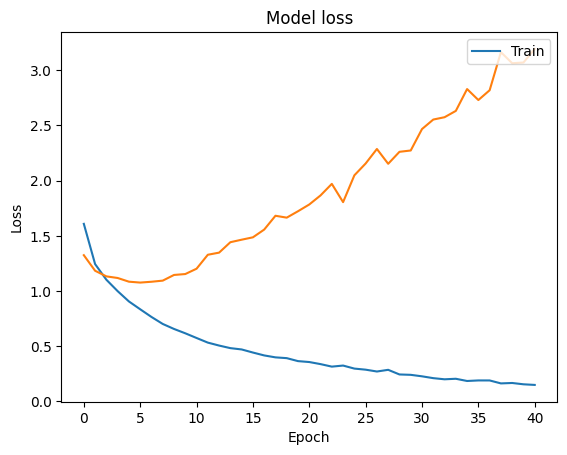

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

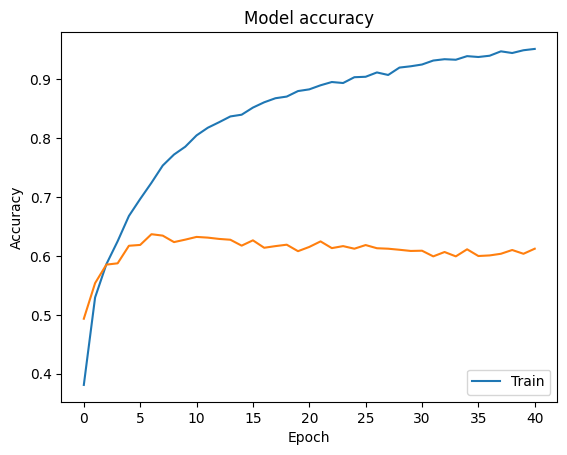

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()